In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df_train = pd.read_csv("../train.csv")
df_test = pd.read_csv("../test.csv")

In [5]:
df_train.head()

,Sequence,Active
0,DKWL,0
1,FCHN,0
2,KDQP,0
3,FNWI,0
4,NKRM,0


In [6]:
df_test.head()

,Sequence
0,HWFK
1,MWPW
2,ALDV
3,NTLG
4,LHYY


In [7]:
df_train.describe()

,Active
count,112000.000000
mean,0.037616
std,0.190267
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## Data Analysis

#### Ref : https://github.com/ronakvijay/Protein_Sequence_Classification/blob/master/Pfam_protein_sequence_classification.ipynb

In [8]:
from collections import Counter

def get_code_freq(df, data_name):
  
    df = df.apply(lambda x: " ".join(x))

    codes = []
    for i in df: # concatination of all codes
        codes.extend(i)

    codes_dict= Counter(codes)
    codes_dict.pop(' ') # removing white space

    print(f'Codes: {data_name}')
    print(f'Total unique codes: {len(codes_dict.keys())}')

    df = pd.DataFrame({'Code': list(codes_dict.keys()), 'Freq': list(codes_dict.values())})
    return df.sort_values('Freq', ascending=False).reset_index()[['Code', 'Freq']]
  
# train code sequence
train_code_freq = get_code_freq(df_train['Sequence'], 'Train')
test_code_freq = get_code_freq(df_test['Sequence'], 'Test')


Codes: Train
Total unique codes: 20
Codes: Test
Total unique codes: 20


In [9]:
train_code_freq

,Code,Freq
0,V,22560
1,K,22506
2,D,22495
3,T,22488
4,N,22487
5,L,22478
6,A,22453
7,Y,22448
8,P,22401
9,C,22398


In [10]:
test_code_freq

,Code,Freq
0,M,9749
1,F,9727
2,H,9723
3,Q,9710
4,G,9670
5,I,9653
6,E,9625
7,S,9622
8,W,9621
9,R,9614


In [11]:
def plot_code_freq(df, data_name):
  
    plt.title(f'Code frequency: {data_name}')
    sns.barplot(x='Code', y='Freq', data=df)

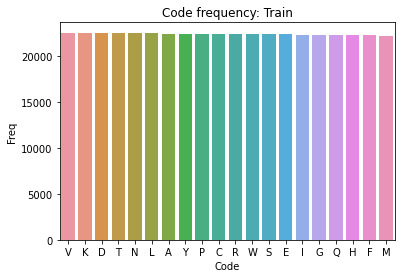

In [12]:
plot_code_freq(train_code_freq, 'Train')

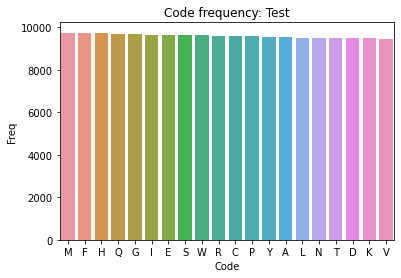

In [13]:
plot_code_freq(test_code_freq, 'Test')

## Text processing

In [14]:
codes = ['V', 'K', 'D', 'T', 'N', 'L', 'A', 'Y', 'P', 'C',
         'R', 'W', 'S', 'E', 'I', 'G', 'Q', 'H', 'F', 'M']

def create_dict(codes):
    char_dict = {}
    for index, val in enumerate(codes):
        char_dict[val] = index+1

    return char_dict

char_dict = create_dict(codes)

print(char_dict)
print("Dict Length:", len(char_dict))

{'V': 1, 'K': 2, 'D': 3, 'T': 4, 'N': 5, 'L': 6, 'A': 7, 'Y': 8, 'P': 9, 'C': 10, 'R': 11, 'W': 12, 'S': 13, 'E': 14, 'I': 15, 'G': 16, 'Q': 17, 'H': 18, 'F': 19, 'M': 20}
Dict Length: 20


In [15]:
# Let's convert each character to an integer

def integer_encoding(data):
    
    
    encode_list = []
    for row in data['Sequence'].values:
        row_encode = []
        for code in row:
            row_encode.append(char_dict.get(code, 0))
        encode_list.append(np.array(row_encode))
  
    return encode_list

In [16]:
train_encode = integer_encoding(df_train) 
test_encode = integer_encoding(df_test) 


In [19]:
# Let's now one hot encode our training and test data

from sklearn.preprocessing import OneHotEncoder


ohe = OneHotEncoder()
ohe.fit(train_encode)
X_train_enc = ohe.transform(train_encode)
X_test_enc = ohe.transform(test_encode)


In [20]:
train_labels = df_train.pop("Active")


In [24]:
X_train_enc[:5,:1]

<5x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

## Classification

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


clf = LogisticRegression(random_state=0)
skf = StratifiedKFold(n_splits=10)
f1_scores = cross_val_score(clf, X_train_enc, train_labels, scoring = 'f1', cv = skf, n_jobs = -1)
print(f1_scores)

### Random Forest

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(random_state=0)
skf = StratifiedKFold(n_splits=10)
f1_scores = cross_val_score(clf, X_train_enc, train_labels, scoring = 'f1', cv = skf, n_jobs = -1)
print(f1_scores)

### SVM

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC


clf = SVC(random_state=0)
skf = StratifiedKFold(n_splits=10)
f1_scores = cross_val_score(clf, X_train_enc, train_labels, scoring = 'f1', cv = skf, n_jobs = -1)
print(f1_scores)

### Grid Search for SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.svm import SVC

X_train, X_val, y_train, y_val = train_test_split(X_train_enc, train_labels, test_size = 0.2, random_state = 2020, stratify = train_labels)

Cs = [1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]


for ker in ['rbf', 'poly']:
    
    for i in Cs:
        for j in gammas:

            print("Kernel = ", ker, ", C = ", i, ", Gamma = ", j, "\n")

            clf = SVC(kernel = ker, random_state=2020, gamma = j , C = i)
            skf = StratifiedKFold(n_splits=5)
            CV_f1 = cross_val_score(clf, X_train, y_train, scoring = 'f1', cv = skf, n_jobs = -1)
            print("F1 score = ", CV_f1)
            print ("Mean F1 score = ", np.mean(CV_f1))
            print ("\n_______________________________________________________________________\n")






In [ ]:


'''
Kernel =  rbf , C =  1 , Gamma =  0.001 

F1 score =  [0. 0. 0. 0. 0.]
Mean F1 score =  0.0

_______________________________________________________________________

Kernel =  rbf , C =  1 , Gamma =  0.01 

F1 score =  [0.00296296 0.02342606 0.         0.05202312 0.        ]
Mean F1 score =  0.015682429168731526

_______________________________________________________________________

Kernel =  rbf , C =  1 , Gamma =  0.1 

F1 score =  [0.75783972 0.744551   0.76256499 0.74125874 0.73637176]
Mean F1 score =  0.7485172433927103

_______________________________________________________________________

Kernel =  rbf , C =  1 , Gamma =  1 

F1 score =  [0.78184991 0.76165347 0.78019114 0.74219447 0.76190476]
Mean F1 score =  0.7655587512127822

_______________________________________________________________________

Kernel =  rbf , C =  10 , Gamma =  0.001 

F1 score =  [0.03183792 0.03768116 0.01466276 0.05475504 0.00296296]
Mean F1 score =  0.02837996765456697

_______________________________________________________________________

Kernel =  rbf , C =  10 , Gamma =  0.01 

F1 score =  [0.65507777 0.62719704 0.65398551 0.63971249 0.6329588 ]
Mean F1 score =  0.6417863209807314

_______________________________________________________________________

Kernel =  rbf , C =  10 , Gamma =  0.1 

F1 score =  [0.86111111 0.8411215  0.87128713 0.84735202 0.85533597]
Mean F1 score =  0.8552415456905301

_______________________________________________________________________

Kernel =  rbf , C =  10 , Gamma =  1 

F1 score =  [0.81687764 0.80541455 0.82450331 0.78006873 0.81025641]
Mean F1 score =  0.8074241277550543

_______________________________________________________________________

Kernel =  rbf , C =  100 , Gamma =  0.001 

F1 score =  [0.5752381  0.56766917 0.58450047 0.57866184 0.58666667]
Mean F1 score =  0.5785472492350261

_______________________________________________________________________

Kernel =  rbf , C =  100 , Gamma =  0.01 

F1 score =  [0.79470199 0.79438481 0.80721903 0.77591973 0.78061224]
Mean F1 score =  0.7905675604066669

_______________________________________________________________________

Kernel =  rbf , C =  100 , Gamma =  0.1 

F1 score =  [0.87958115 0.86716418 0.87296898 0.86209495 0.86851991]
Mean F1 score =  0.8700658345188262

_______________________________________________________________________

Kernel =  rbf , C =  100 , Gamma =  1 

F1 score =  [0.81687764 0.80541455 0.82450331 0.78006873 0.81025641]
Mean F1 score =  0.8074241277550543

_______________________________________________________________________

Kernel =  poly , C =  1 , Gamma =  0.001 

F1 score =  [0. 0. 0. 0. 0.]
Mean F1 score =  0.0

_______________________________________________________________________

Kernel =  poly , C =  1 , Gamma =  0.01 

F1 score =  [0. 0. 0. 0. 0.]
Mean F1 score =  0.0

_______________________________________________________________________

Kernel =  poly , C =  1 , Gamma =  0.1 

F1 score =  [0.00296296 0.01472754 0.00591716 0.01472754 0.00591716]
Mean F1 score =  0.008850472698212587

_______________________________________________________________________

Kernel =  poly , C =  1 , Gamma =  1 

F1 score =  [0.87171793 0.85607196 0.86706056 0.85151515 0.86336336]
Mean F1 score =  0.8619457939357458

_______________________________________________________________________

Kernel =  poly , C =  10 , Gamma =  0.001 

F1 score =  [0. 0. 0. 0. 0.]
Mean F1 score =  0.0

_______________________________________________________________________

Kernel =  poly , C =  10 , Gamma =  0.01 

F1 score =  [0. 0. 0. 0. 0.]
Mean F1 score =  0.0

_______________________________________________________________________

Kernel =  poly , C =  10 , Gamma =  0.1 

F1 score =  [0.82798354 0.79734219 0.82508251 0.78275571 0.80101609]
Mean F1 score =  0.80683600678602

_______________________________________________________________________

Kernel =  poly , C =  10 , Gamma =  1 

F1 score =  [0.87171793 0.85607196 0.86706056 0.85151515 0.86336336]
Mean F1 score =  0.8619457939357458

_______________________________________________________________________

Kernel =  poly , C =  100 , Gamma =  0.001 

F1 score =  [0. 0. 0. 0. 0.]
Mean F1 score =  0.0

_______________________________________________________________________

Kernel =  poly , C =  100 , Gamma =  0.01 

F1 score =  [0. 0. 0. 0. 0.]
Mean F1 score =  0.0

_______________________________________________________________________

Kernel =  poly , C =  100 , Gamma =  0.1 

F1 score =  [0.8786737  0.85048835 0.86750555 0.85280728 0.86963075]
Mean F1 score =  0.8638211271892609

_______________________________________________________________________

Kernel =  poly , C =  100 , Gamma =  1 

F1 score =  [0.87171793 0.85607196 0.86706056 0.85151515 0.86336336]
Mean F1 score =  0.8619457939357458

'''

### Prediction on validation set

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

clf = SVC(kernel = 'rbf', random_state=2020, gamma = 0.1 , C = 100)
clf.fit(X_train, y_train)
y_pred = pd.DataFrame(clf.predict(X_val))
print(f1_score(y_pred, y_val))

0.8891580860084798


In [26]:
y_pred.to_csv("prediction", header = False, index = False)

## Following was not used to make predictions !!

### Feature Engineering

#### Let's separate 4 letter combinations into different columns

In [ ]:
def split(df):
    df[['Seq_letter_1','Seq_letter_2', 'Seq_letter_3','Seq_letter_4']] = df.Sequence.str.extract(pat = '([A-Z])([A-Z])([A-Z])([A-Z])', expand = False)
    return df

In [ ]:
df_train = split(df_train)
df_test = split(df_test)

In [ ]:
df_train

In [ ]:
df_test

In [ ]:
y_train = df_train.pop("Active")
y_train

In [ ]:
# df_train.drop("Sequence", axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder


def multicolumn_label_encode(df):
    
    df.drop("Sequence", axis = 1, inplace = True)
    
    df = pd.DataFrame(columns=df.columns, data=LabelEncoder().fit_transform(df.values.flatten()).reshape(df.shape))
    return df

In [ ]:
X_train = multicolumn_label_encode(df_train)